# Adagrad
#### 'Adaptive gradient algorithm'

\begin{align}
x_i^{(k+1)}  & = x_i^{(k)} -\frac{\alpha}{\epsilon + \sqrt{s_i^{k}}}g_i^{(k)}
\end{align}

\begin{align}
s_i^{(k)}  & = \sum_{j=1}^k (g_i^{(j)})^{2}
\end{align}

In [ ]:

from matplotlib import pyplot as plt
import numpy as np
import math
from sympy import *

def i_function(x, y):
    return 0.1* x ** 2 + 2 * y ** 2

def show_plot(f):
    x, y = np.meshgrid(np.arange(-5.5, 1.0, 0.1), np.arange(-3.0, 1.0, 0.1))

    plt.contour(x, y, f(x, y), colors='b')
    plt.title('Test function')
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

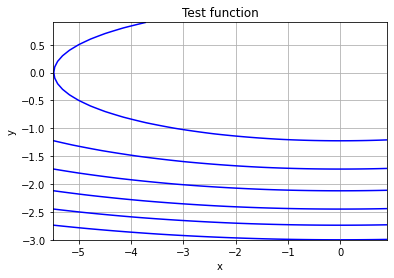

In [24]:
show_plot(i_function)

episodes: 250, x -0.016240, y -0.000000


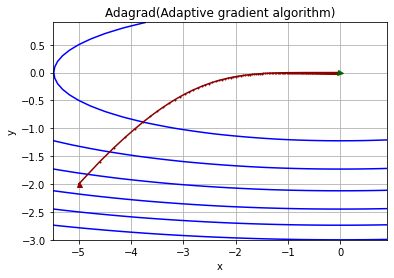

In [25]:
def i_function(x, y):
    return 0.1* x ** 2 + 2 * y ** 2

def i_func_der():
    x = Symbol('x')
    y = Symbol('y')

    f1 = 0.1 * x ** 2
    f2 = 2 * y ** 2
    
    return f1,f2

def f_adagrad(xx, yy, sx, sy):
    eps = 1e-6
    alfa = 0.4

    f1, f2 = i_func_der()

    x = Symbol('x')
    y = Symbol('y')

    g1 = f1.diff(x)
    g2 = f2.diff(y)

    g1 = lambdify(x, g1)
    g2 = lambdify(y, g2)

    sx += g1(xx) ** 2
    sy += g2(yy) ** 2

    xx -= alfa / math.sqrt(sx + eps) * g1(xx)
    yy -= alfa / math.sqrt(sy + eps) * g2(yy)

    return xx, yy, sx, sy

def f_step(trener, steps):
    xx, yy, sx, sy = -5, -2, 0, 0

    results = [xx,yy]

    for i in range(steps):
        xx, yy, sx, sy = trener(xx, yy, sx, sy)

        results.append(xx)
        results.append(yy)

    print('episodes: %d, x %f, y %f' % (i + 1, xx, yy))
    return results

def show_plot(f, results):
    r,r2=[],[]

    for i in range(len(results)):
        if i%2==0:
            r.append(results[i])
        else:
            r2.append(results[i])

    plt.plot(r,r2,'-o',markersize=1, color="darkred")

    x, y = np.meshgrid(np.arange(-5.5, 1.0, 0.1), np.arange(-3.0, 1.0, 0.1))

    plt.contour(x, y, f(x, y), colors='b')
    plt.title('Adagrad(Adaptive gradient algorithm)')
    plt.plot(r[0],r2[0], marker='^', markersize=5, color="darkred")
    plt.plot(0, 0, marker='>', markersize=5, color="darkgreen")
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
if __name__ == "__main__":
    steps=250
    show_plot(i_function, f_step(f_adagrad,steps))